In [1]:
library(Seurat)
library(Signac)
library(magrittr)
library(ggplot2)
library(BiocIO)
library(genomation)
library(Rsamtools)

Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built under R 4.3.2 but the current version is
4.3.3; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed

‘SeuratObject’ was built with package ‘Matrix’ 1.6.3 but the current
version is 1.6.5; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Loading required package: grid

Warning message:
“replacing previous import ‘Biostrings::pattern’ by ‘grid::pattern’ when loading ‘genomation’”
Loading required package: GenomeInfoDb

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:SeuratObject’:

    intersect


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    a

load IGVF K562 seurat object

In [2]:
obj.seurat.raw = readRDS("../../../data/K562_IGVF/1.prepare_data/1.import_IGVF_processed_data.240508/obj.seurat.rds")

In [3]:
obj.seurat.raw

An object of class Seurat 
248403 features across 6266 samples within 2 assays 
Active assay: ATAC (208977 features, 208977 variable features)
 2 layers present: counts, data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, lsi, umap

Check data quality

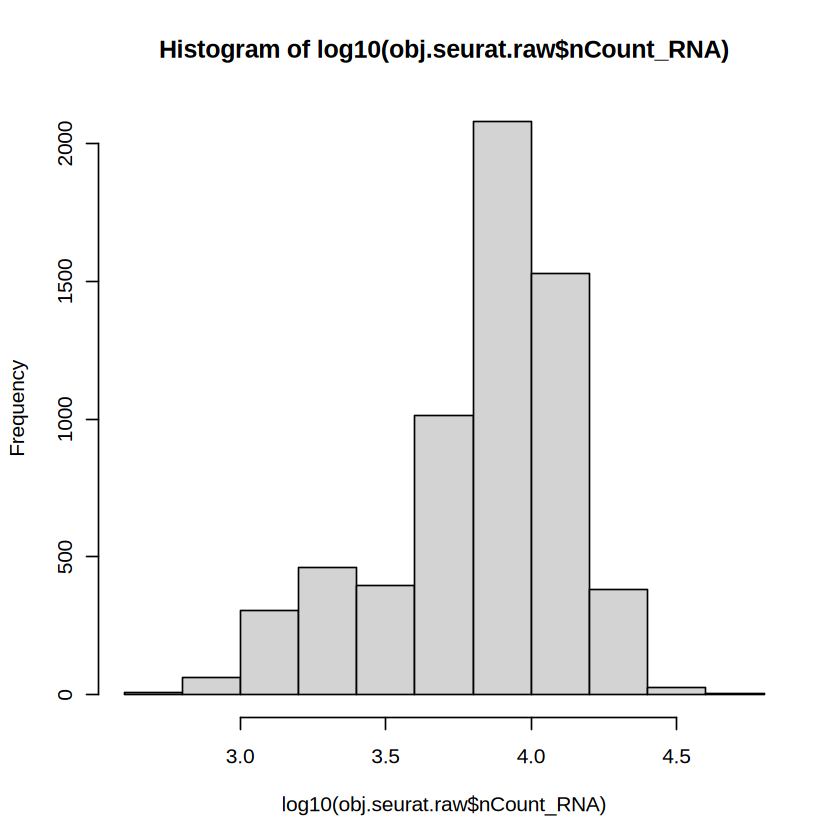

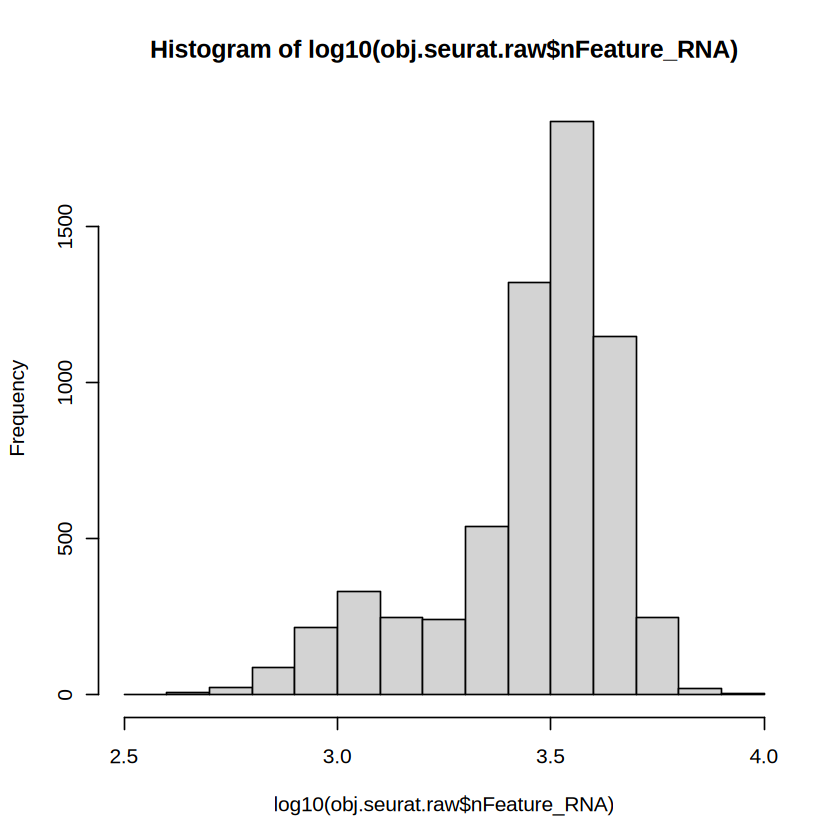

In [4]:
hist(log10(obj.seurat.raw$nCount_RNA))
hist(log10(obj.seurat.raw$nFeature_RNA))

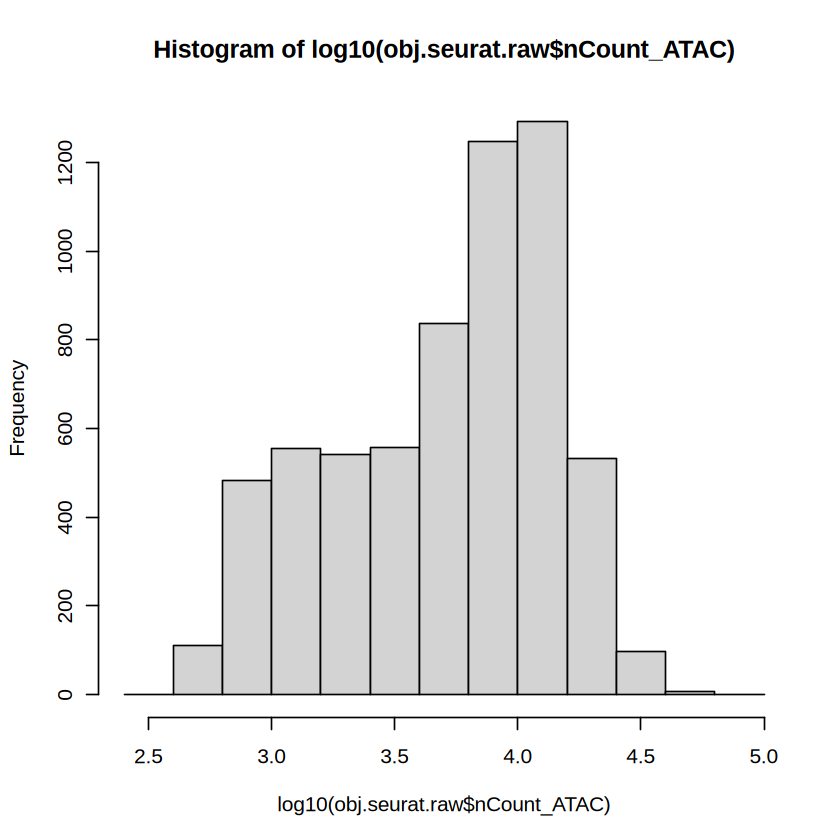

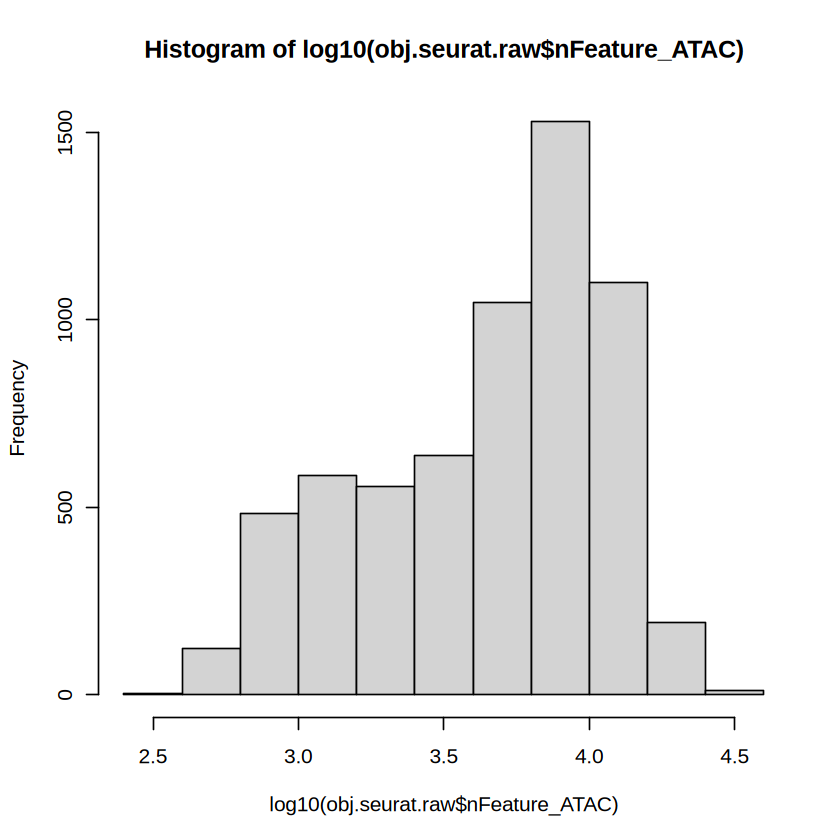

In [5]:
hist(log10(obj.seurat.raw$nCount_ATAC))
hist(log10(obj.seurat.raw$nFeature_ATAC))

In [6]:
obj.seurat = subset(obj.seurat.raw,
                    cells = colnames(obj.seurat.raw)[log10(obj.seurat.raw$nCount_RNA) > 3.6 & 
                                                     log10(obj.seurat.raw$nCount_ATAC) > 3])

In [7]:
obj.seurat

An object of class Seurat 
248403 features across 4785 samples within 2 assays 
Active assay: ATAC (208977 features, 208977 variable features)
 2 layers present: counts, data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, lsi, umap

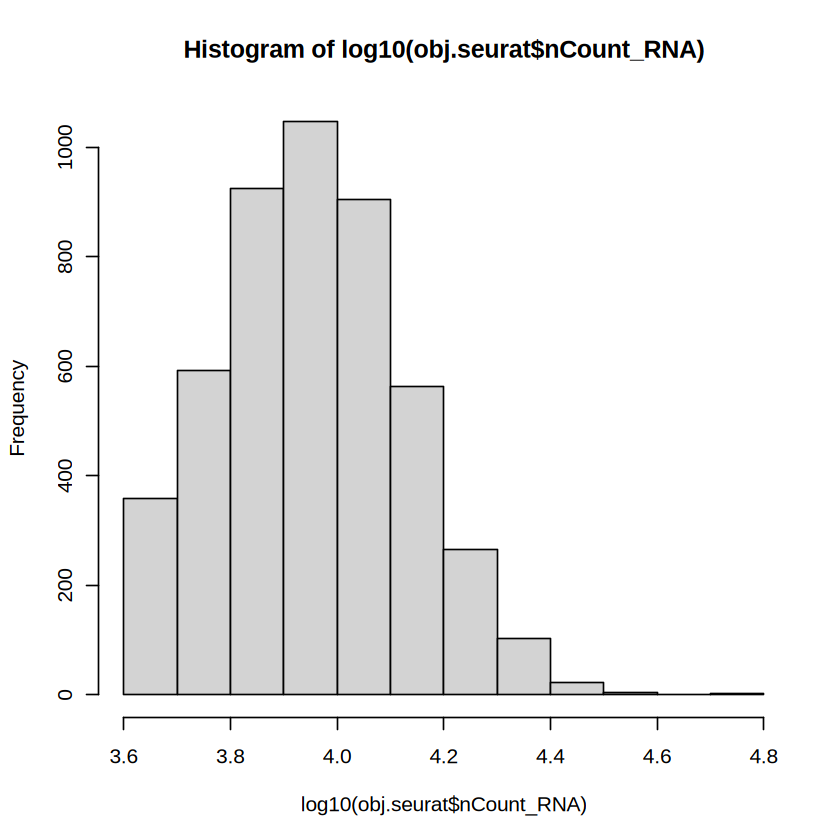

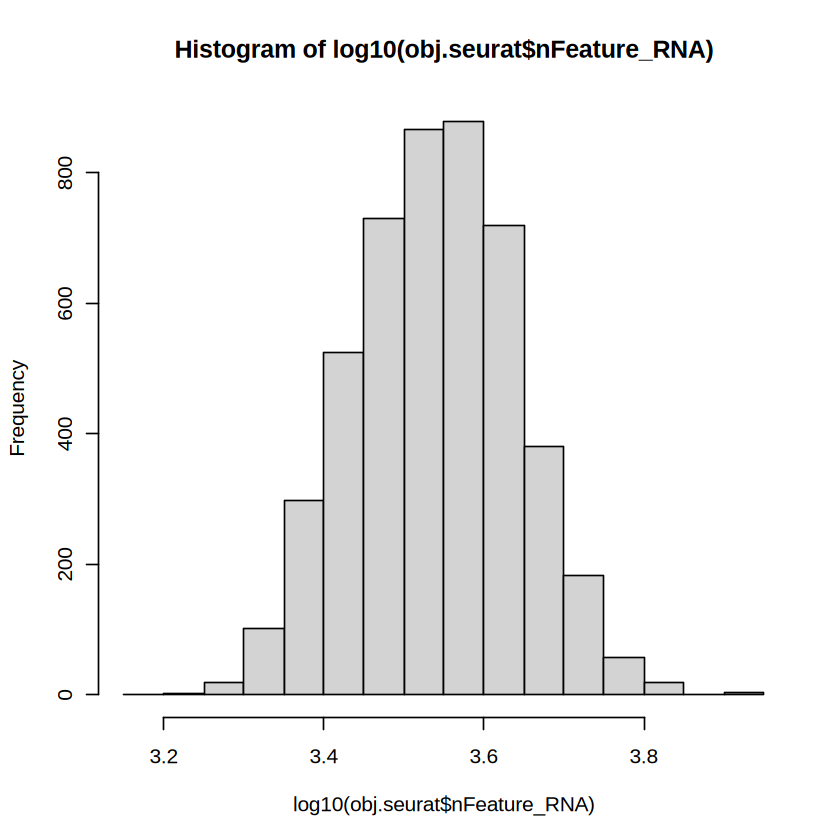

In [8]:
hist(log10(obj.seurat$nCount_RNA))
hist(log10(obj.seurat$nFeature_RNA))

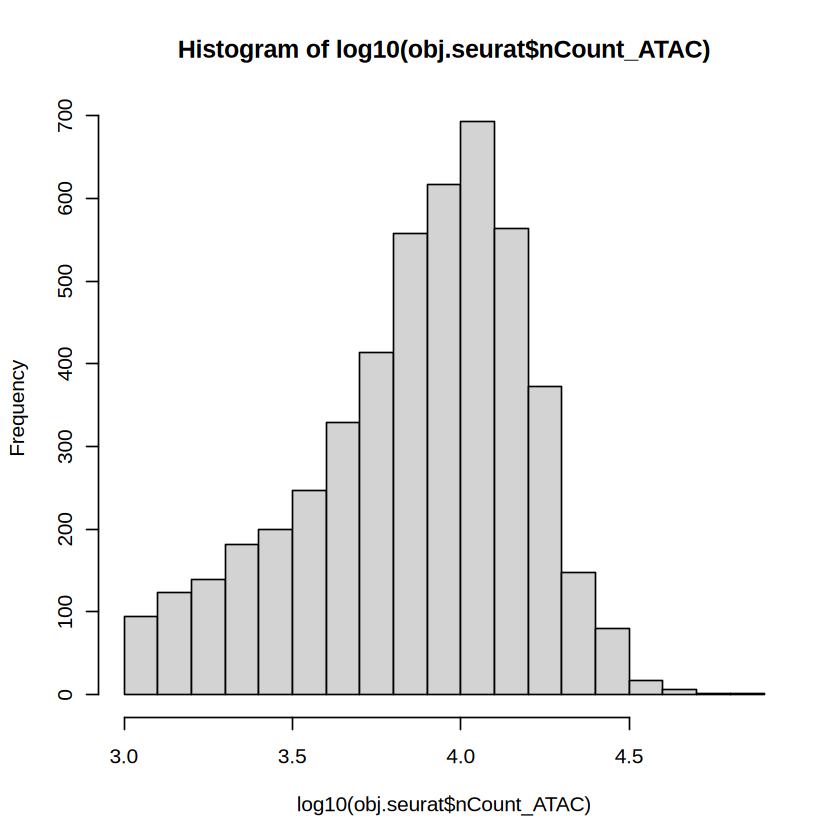

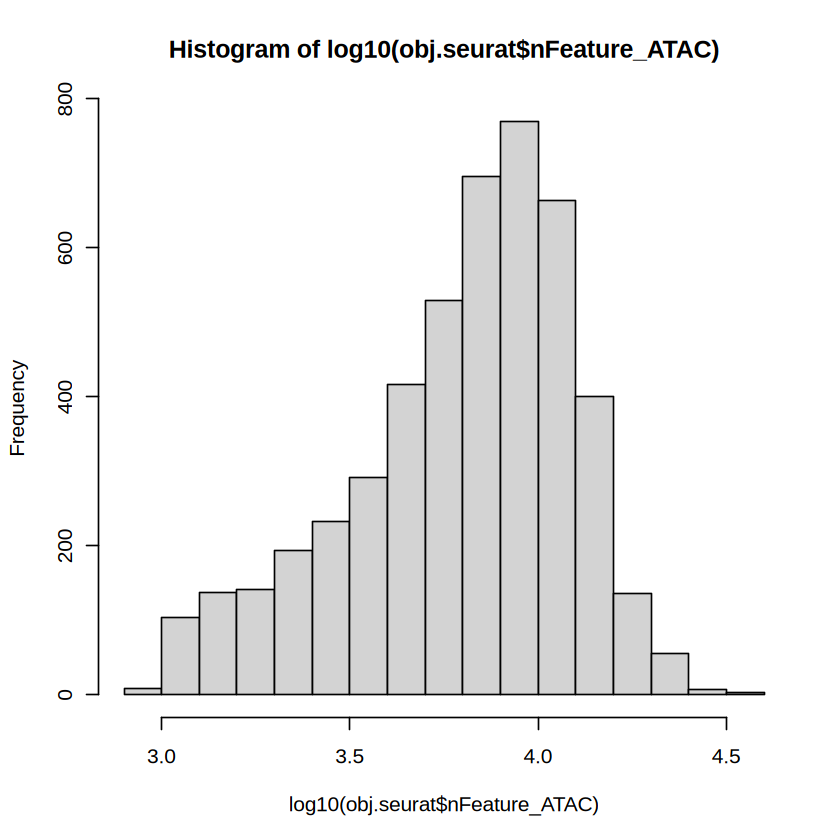

In [9]:
hist(log10(obj.seurat$nCount_ATAC))
hist(log10(obj.seurat$nFeature_ATAC))

In [10]:
DefaultAssay(obj.seurat) <- 'RNA'

In [11]:
obj.seurat[["percent.mt"]] <- PercentageFeatureSet(obj.seurat, pattern = "^MT-")

In [12]:
DefaultAssay(obj.seurat) <- "ATAC"
obj.seurat <- NucleosomeSignal(obj.seurat)
obj.seurat <- TSSEnrichment(obj.seurat)

Extracting TSS positions

Extracting fragments at TSSs

Warning message in cc + as.vector(x = counts.center):
“longer object length is not a multiple of shorter object length”
Warning message in cc[names(x = counts.center)] <- cc + as.vector(x = counts.center):
“number of items to replace is not a multiple of replacement length”
Warning message in fc + as.vector(x = counts.flank):
“longer object length is not a multiple of shorter object length”
Warning message in fc[names(x = counts.flank)] <- fc + as.vector(x = counts.flank):
“number of items to replace is not a multiple of replacement length”
Warning message in cc + as.vector(x = counts.center):
“longer object length is not a multiple of shorter object length”
Warning message in cc[names(x = counts.center)] <- cc + as.vector(x = counts.center):
“number of items to replace is not a multiple of replacement length”
Warning message in fc + as.vector(x = counts.flank):
“longer object length is not a multiple of shorter object length”
War

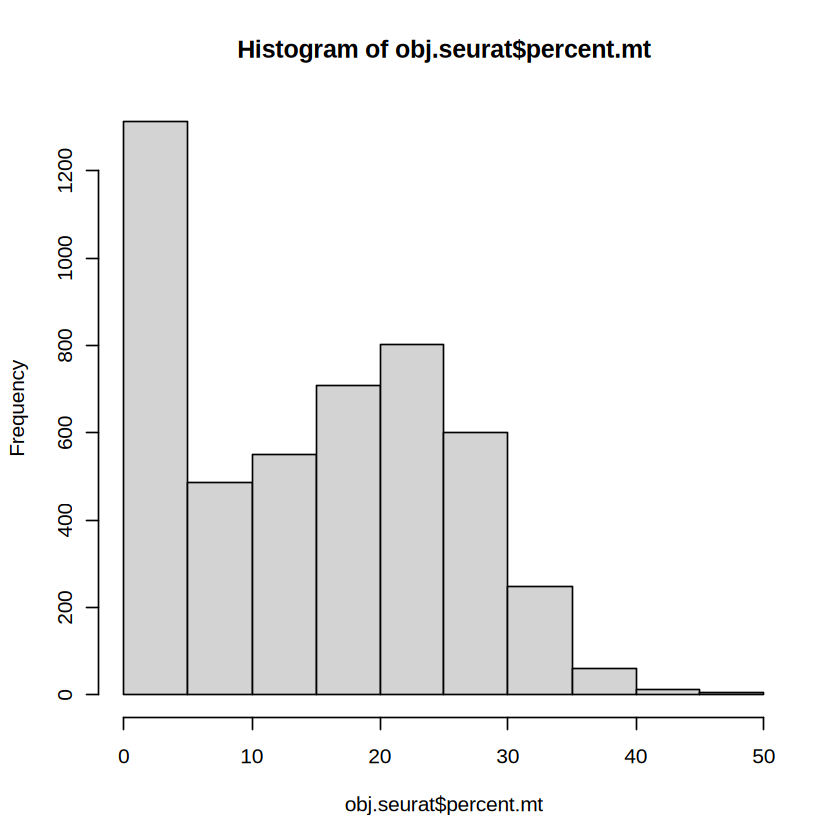

In [13]:
hist(obj.seurat$percent.mt)

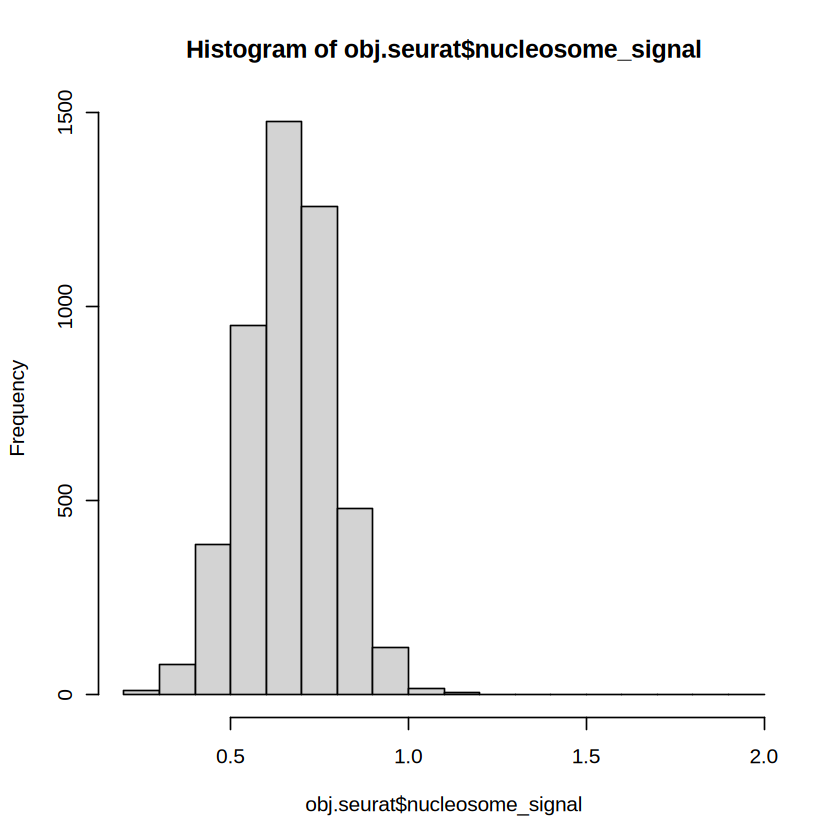

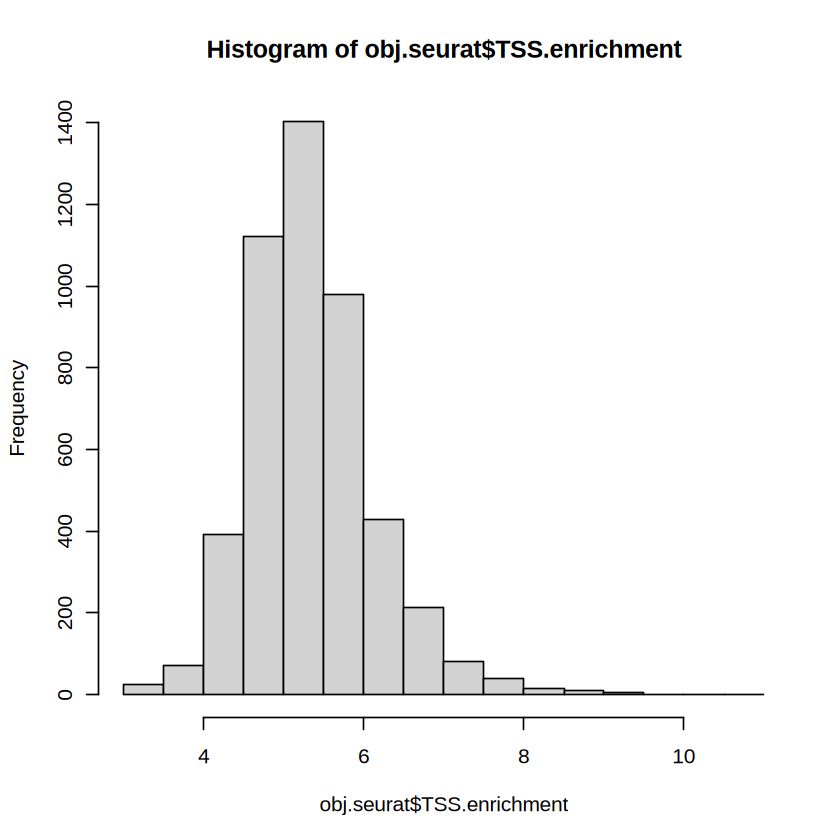

In [14]:
hist(obj.seurat$nucleosome_signal)
hist(obj.seurat$TSS.enrichment)

In [15]:
obj.seurat.qc = subset(obj.seurat,
                       subset = percent.mt < 30 & 
                       nucleosome_signal < 1.5 & 
                       TSS.enrichment > 3)

In [16]:
obj.seurat.qc

An object of class Seurat 
248403 features across 4459 samples within 2 assays 
Active assay: ATAC (208977 features, 208977 variable features)
 2 layers present: counts, data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, lsi, umap

In [17]:
summary(obj.seurat.qc$nCount_RNA)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3983    6754    8874    9711   11726   60624 

In [18]:
summary(obj.seurat.qc$nFeature_RNA)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1803    2954    3497    3571    4084    8224 

In [19]:
summary(obj.seurat.qc$nCount_ATAC)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1003    4647    8222    9255   12519   68912 

In [20]:
summary(obj.seurat.qc$nFeature_ATAC)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    972    4184    7044    7543   10144   37688 

Plot K562 RNA UMAP

In [21]:
DefaultAssay(obj.seurat.qc) <- "RNA"
obj.seurat.qc <- obj.seurat.qc %>%
  NormalizeData() %>%
  FindVariableFeatures() %>%
  ScaleData() %>%
  RunPCA() %>%
  RunUMAP(dims = 1:30) %>%
  FindNeighbors(dims = 1:30) %>%
  FindClusters()

Centering and scaling data matrix

PC_ 1 
Positive:  YTHDC1, ARL8B, UGCG, ABHD5, KLHL24, WAC, SQSTM1, GPCPD1, STAM, HBP1 
	   OGA, TRA2A, ECT2, MXD1, UBE2B, DYRK1A, TFRC, ATP13A3, AFF4, CCNL1 
	   SLC19A2, TXNL1, KDM3A, MTF2, IST1, LGR4, ELL2, STAG2, ARHGAP12, CRY1 
Negative:  LINC00534, CCDC26, STXBP5, AIG1, LINC01033, ENSG00000254180, MIR223HG, LINC00861, PLCL1, SLC38A4-AS1 
	   ENSG00000266976, FHIT, ADAMTS3, CALCRL-AS1, STON2, GPC5, HTR1F, COLGALT2, MT-ATP6, ENSG00000227748 
	   RUNX1, WWOX, MTATP6P1, CD69, PRKN, ALOX12-AS1, CRPPA, BCAS3, MAGI1, ENSG00000285838 
PC_ 2 
Positive:  KIF14, CIT, HP1BP3, CENPE, KIF4A, CDCA2, STIL, CDC25C, DEPDC1B, ASPM 
	   NDC80, KIF18A, KIF18B, BUB1B, CENPF, ECT2, BUB1, TPX2, ANLN, CDK1 
	   CKAP5, NUF2, SGO2, CENPC, CDCA8, KIF23, G2E3, PIF1, NCAPG, TOP2A 
Negative:  MT-ND2, MT-CO1, MT-ND4, MT-CYB, MT-ND3, MT-ND1, MT-ND5, FTL, HSPA5, MT-ND4L 
	   MT-ATP6, MTATP6P1, HSP90B1, MT-ND6, ENSG00000230021, TIMP1, APOE, CD63, FTH1, CALR 
	   PDIA6, PDIA4, SDF2

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4785
Number of edges: 172281

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7600
Number of communities: 12
Elapsed time: 0 seconds


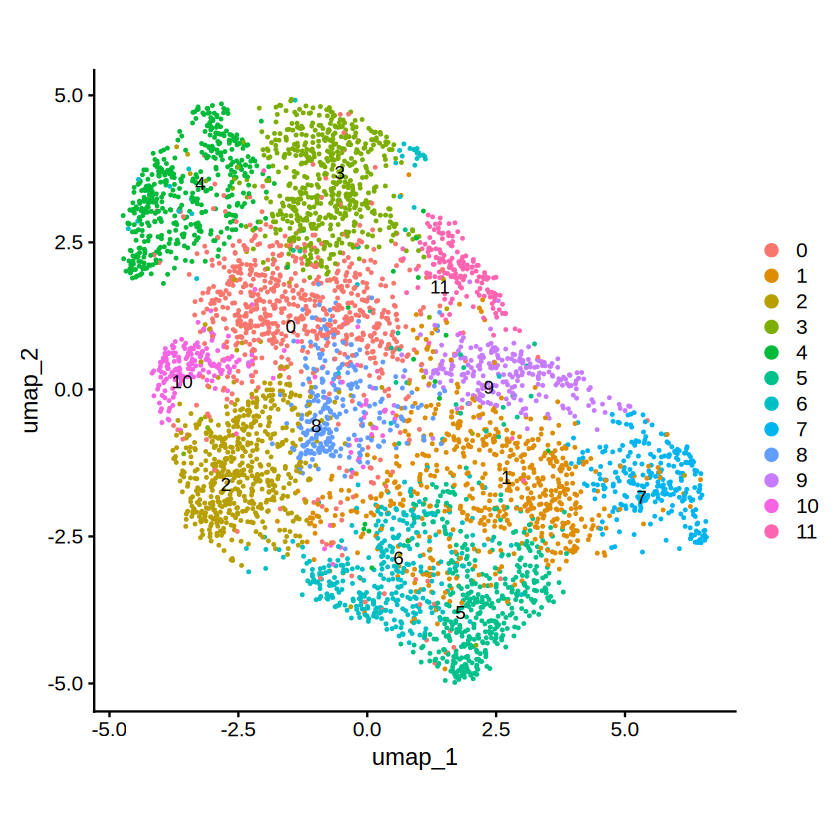

In [22]:
DimPlot(obj.seurat.qc, label = TRUE, repel = TRUE, reduction = "umap")  +
  theme(aspect.ratio=1)

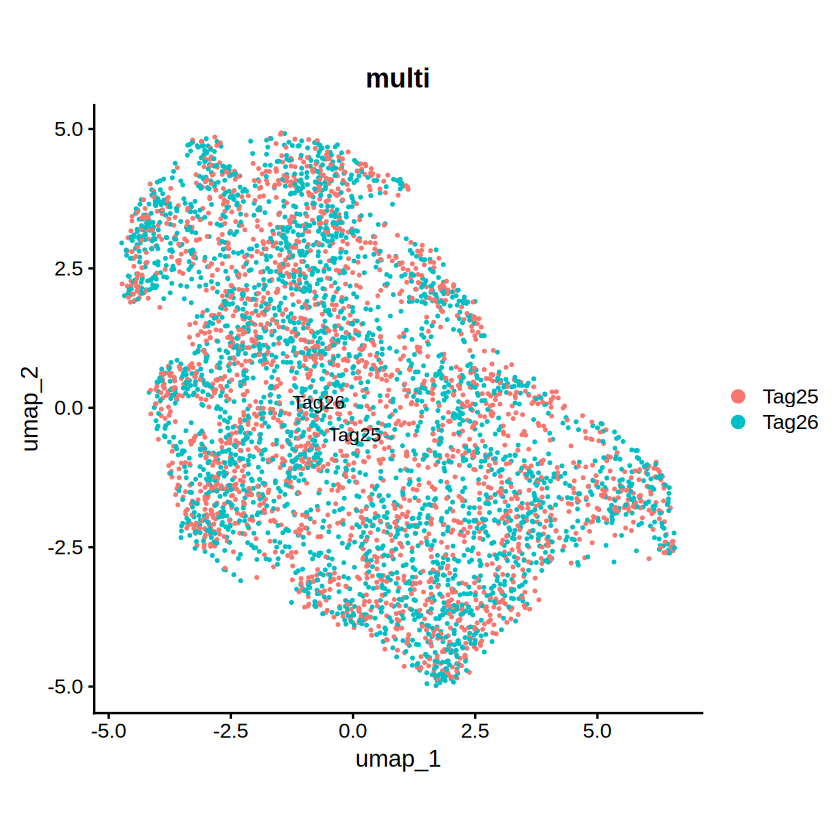

In [23]:
DimPlot(obj.seurat.qc, label = TRUE, repel = TRUE, reduction = "umap", group.by = "multi")  +
  theme(aspect.ratio=1)

Plot ATAC UMAP

In [24]:
DefaultAssay(obj.seurat.qc) <- "ATAC"
obj.seurat.qc <- obj.seurat.qc %>%
  RunTFIDF() %>%
  FindTopFeatures(min.cutoff = 'q0') %>%
  RunSVD() %>%
  RunUMAP(reduction = 'lsi', dims = 2:30) %>%
  FindNeighbors(reduction = 'lsi', dims = 2:30) %>%
  FindClusters(verbose = FALSE, algorithm = 3)

Performing TF-IDF normalization

Warning message in RunTFIDF.default(object = GetAssayData(object = object, slot = "counts"), :
“Some features contain 0 total counts”
Running SVD

Scaling cell embeddings

12:40:07 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

12:40:07 Read 4785 rows and found 29 numeric columns

12:40:07 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

12:40:07 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

12:40:07 Writing NN index file to temp file /tmp/RtmpJKjP1f/filefca8f5078a2b

12:40:07 Searching Annoy index using 1

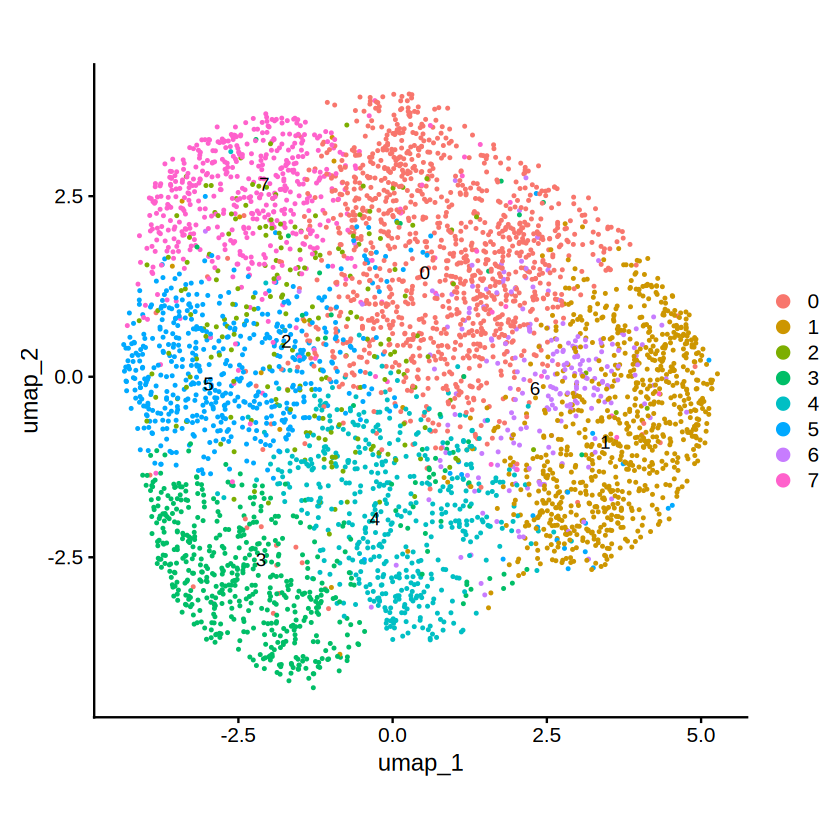

In [28]:
DimPlot(obj.seurat.qc, label = TRUE, repel = TRUE, reduction = "umap")  +
  theme(aspect.ratio=1)

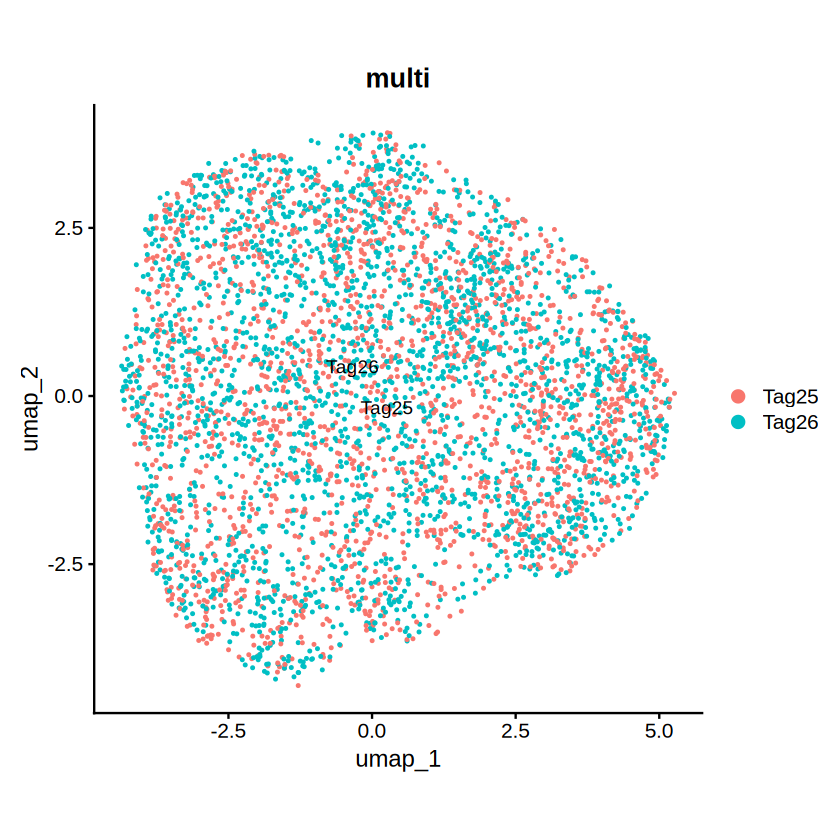

In [29]:
DimPlot(obj.seurat.qc, label = TRUE, repel = TRUE, reduction = "umap", group.by = "multi")  +
  theme(aspect.ratio=1)

Output fragment file for K562 cells

In [30]:
atac_fragments.e10l1 = read.delim("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/IGVF_240503/230707_IGVF10_McGinnis/ATAC/CELLRANGER/crE10L1_atac/outs/fragments.tsv.gz",
                                  header = F,
                                  comment.char = "#")

In [31]:
atac_fragments.e10l2 = read.delim("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/project/E2G/processed/IGVF_240503/230707_IGVF10_McGinnis/ATAC/CELLRANGER/crE10L2_atac/outs/fragments.tsv.gz",
                                  header = F,
                                  comment.char = "#")

In [32]:
atac_fragments.e10l1.filter = 
  atac_fragments.e10l1[atac_fragments.e10l1$V4 %in% obj.seurat.qc$barcode,]
atac_fragments.e10l1.filter = 
  atac_fragments.e10l1.filter[atac_fragments.e10l1.filter$V1 %in% paste("chr",c(1:22,"X","Y"), sep = ""),]
atac_fragments.e10l1.filter[,4] = paste("e10l1",atac_fragments.e10l1.filter[,4],sep = "_")
atac_fragments.e10l1.filter

,V1,V2,V3,V4,V5
,<chr>,<int>,<int>,<chr>,<int>
28,chr1,10073,10204,e10l1_CTGTGGCGTGCTCATG-1,2
37,chr1,10073,10279,e10l1_TGGATTCGTAGTCCTG-1,2
46,chr1,10073,10316,e10l1_GTGTGGCAGCAGGTAT-1,1
92,chr1,10084,10334,e10l1_CCAATTAGTGAGTTTC-1,1
101,chr1,10085,10309,e10l1_CCTGTTCGTGCGCAAG-1,2
184,chr1,10103,10279,e10l1_GAATATCCACCTTCCT-1,1
185,chr1,10103,10285,e10l1_CCAATACGTAGTCATC-1,2
315,chr1,10151,10179,e10l1_TAGCAAGGTTGAGGTA-1,1
334,chr1,10151,10180,e10l1_GGAGCATGTGGACAAC-1,1


In [33]:
atac_fragments.e10l2.filter = 
  atac_fragments.e10l2[atac_fragments.e10l2$V4 %in% obj.seurat.qc$barcode,]
atac_fragments.e10l2.filter = 
  atac_fragments.e10l2.filter[atac_fragments.e10l2.filter$V1 %in% paste("chr",c(1:22,"X","Y"), sep = ""),]
atac_fragments.e10l2.filter[,4] = paste("e10l2",atac_fragments.e10l2.filter[,4],sep = "_")
atac_fragments.e10l2.filter

,V1,V2,V3,V4,V5
,<chr>,<int>,<int>,<chr>,<int>
53,chr1,10073,10285,e10l2_AGGGTTTAGAAACCTA-1,2
103,chr1,10084,10340,e10l2_GCGTTATGTTCTGGCA-1,1
116,chr1,10085,10309,e10l2_CAGTTTGTCTCCTCAT-1,1
152,chr1,10091,10309,e10l2_AACGGTTAGCTCGACT-1,1
185,chr1,10096,10307,e10l2_GGTTGCGCAGGTTCTT-1,1
196,chr1,10097,10279,e10l2_GCCTTCCTCCTGATAT-1,1
199,chr1,10097,10284,e10l2_TCAGCCTAGATTAGCA-1,1
384,chr1,10145,10216,e10l2_AACCGCGCAAATCCCT-1,1
430,chr1,10151,10180,e10l2_GAGCGGTTCGGTTCAC-1,1


In [34]:
atac_fragments.filter = rbind(atac_fragments.e10l1.filter,
                              atac_fragments.e10l2.filter)

In [35]:
atac_fragments.filter = atac_fragments.filter[order(atac_fragments.filter[,2]),]
atac_fragments.filter = atac_fragments.filter[order(atac_fragments.filter[,1]),]

In [36]:
write.table(atac_fragments.filter,
            "../../../data/K562_IGVF/1.prepare_data/2.Filter_out_low_quality_cells.240614/atac_fragments.tsv",
            col.names = F,
            row.names = F,
            quote = F,
            sep = "\t")
bgzip("../../../data/K562_IGVF/1.prepare_data/2.Filter_out_low_quality_cells.240614/atac_fragments.tsv",
      "../../../data/K562_IGVF/1.prepare_data/2.Filter_out_low_quality_cells.240614/atac_fragments.tsv.gz",
     overwrite = T)


indexTabix("../../../data/K562_IGVF/1.prepare_data/2.Filter_out_low_quality_cells.240614/atac_fragments.tsv.gz",
           format = "bed")

system("../../../data/K562_IGVF/1.prepare_data/2.Filter_out_low_quality_cells.240614/atac_fragments.tsv")

[1] "../../../data/K562_IGVF/1.prepare_data/2.Filter_out_low_quality_cells.240614/atac_fragments.tsv.gz"

[1] "../../../data/K562_IGVF/1.prepare_data/2.Filter_out_low_quality_cells.240614/atac_fragments.tsv.gz.tbi"

Output RNA count matrix file for cells passing qc

In [37]:
write.csv(as.data.frame(obj.seurat.qc@assays$RNA@counts),
          "../../../data/K562_IGVF/1.prepare_data/2.Filter_out_low_quality_cells.240614/rna_count_matrix.csv.gz",
          quote = F)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.3 GiB”


In [38]:
write.csv(t(as.data.frame(obj.seurat.qc@assays$RNA@counts)),
          gzfile("../../../data/K562_IGVF/1.prepare_data/2.Filter_out_low_quality_cells.240614/rna_count_matrix.t.csv.gz"),
          quote = F)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.3 GiB”


Save obj.seurat

In [39]:
saveRDS(obj.seurat.qc,
         "../../../data/K562_IGVF/1.prepare_data/2.Filter_out_low_quality_cells.240614/obj.seurat.qc.rds")

In [40]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux 8.9 (Ootpa)

Matrix products: default
BLAS/LAPACK: /maps/projects/ralab/people/lpm537/software/anaconda3/envs/Notebook_E2G_240505/lib/libopenblasp-r0.3.27.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Copenhagen
tzcode source: system (glibc)

attached base packages:
[1] stats4    grid      stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] Rsamtools_2.18.0     Biostrings_2.70.1    XVector_0.42.0      
 [4] GenomicRanges_1.54.1 GenomeInfoDb_1.38.1  IRanges_2.36.0      

In [41]:
atac_matrix = readRDS("/maps/projects/ralab_nnfc-AUDIT/people/lpm537/software/scE2G_pipeline/240610/sc-E2G/test/results/K562_IGVF_filter/K562/Kendall/atac_matrix.rds")

In [42]:
data.table::fwrite(as.data.frame(as.matrix(atac_matrix)),
                   "../../../data/K562_IGVF/1.prepare_data/2.Filter_out_low_quality_cells.240614/matrix.atac.csv.gz",
                   row.names = T)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 5.1 GiB”
